In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar
import datetime
import hashlib
import random
from IPython.display import Image
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set()

# %matplotlib notebook

In [2]:
beans = pd.read_excel('BeanImagelinks.xlsx')
beans.shape

(12855, 23)

## Cleaning the beans data frame

In [3]:
#checking for duplicate rows
beans.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12850    False
12851    False
12852    False
12853    False
12854    False
Length: 12855, dtype: bool

In [4]:
#removing duplicated rows
beans.drop_duplicates(inplace=True)
beans

,URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,BEAN_DATA_BEAN_IMAGE_GPS_ALT,META_INSTANCE_ID,BEAN_DATA_IMAGE_CLASS,BEAN_DATA_BEAN_COMMENT,BEAN_DATA_BEAN_IMAGE_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_DATA_BEAN_IMAGE_GPS_LAT,BEAN_DATA_START_TIME,BEAN_DATA_DEVICE_ID,IMAGE_LINK
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,anonymousUser,2019-09-23 00:37:14.242,NaN,2019-09-23 00:37:14.242,NaN,NaN,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,...,0.000000,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,other,Testing,2099.999,2019-09-23,0.422191,2019-09-23 00:32:32.194,NaN,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,anonymousUser,2019-09-23 00:47:25.150,NaN,2019-09-23 00:47:25.150,NaN,NaN,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,...,1158.655716,uuid:8305c43b-00fb-4419-9f54-28388d176080,other,NaN,4.000,2019-09-23,0.427186,2019-09-23 00:44:56.938,3.550051e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,anonymousUser,2019-09-23 13:09:22.873,anonymousUser,2019-10-03 09:16:10.751,NaN,NaN,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,...,1156.700000,uuid:d321337b-2369-4479-a39b-7804b79489d8,other,I don't the disease,4.813,2019-09-23,0.521643,2019-09-23 12:21:06.861,NaN,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,anonymousUser,2019-09-23 13:09:42.299,NaN,2019-09-23 13:09:42.299,NaN,NaN,1,2019-09-23 13:09:42.293,2019-09-23 13:09:42.293,...,1146.000000,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,als,Commlon bacteria blight,7.300,2019-09-23,0.521536,2019-09-23 12:55:59.742,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,anonymousUser,2019-09-23 13:13:06.757,NaN,2019-09-23 13:13:06.757,NaN,NaN,1,2019-09-23 13:13:06.750,2019-09-23 13:13:06.750,...,1127.700000,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,other,Leaf spot,3.900,2019-09-23,0.521570,2019-09-23 12:33:52.393,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12850,uuid:4837fc0b-4b1f-4f00-ad20-f874e9265870,anonymousUser,2020-04-26 15:57:34.445,NaN,2020-04-26 15:57:34.445,NaN,NaN,1,2020-04-26 15:57:34.429,2020-04-26 15:57:34.429,...,1172.300000,uuid:4837fc0b-4b1f-4f00-ad20-f874e9265870,other,Infected leaves,4.724,2020-04-26,0.715378,2020-04-26 13:32:47.011,3.595541e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
12851,uuid:31fff940-5a29-4c14-91c5-96c685cfbd4a,anonymousUser,2020-04-26 15:57:39.266,NaN,2020-04-26 15:57:39.266,NaN,NaN,1,2020-04-26 15:57:39.252,2020-04-26 15:57:39.252,...,1154.600000,uuid:31fff940-5a29-4c14-91c5-96c685cfbd4a,healthy,NaN,4.641,2020-04-26,0.715577,2020-04-26 13:35:07.165,3.595541e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
12852,uuid:786bf823-9487-4e59-a628-fcf726404c65,anonymousUser,2020-04-26 16:32:28.237,NaN,2020-04-26 16:32:28.237,NaN,NaN,1,2020-04-26 16:32:28.226,2020-04-26 16:32:28.226,...,1154.400000,uuid:786bf823-9487-4e59-a628-fcf726404c65,healthy,NaN,4.466,2020-04-26,0.715421,2020-04-26 13:37:43.468,3.595541e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
12853,uuid:d5b79b51-15c4-4151-bebf-0ef1a46caea0,anonymousUser,2020-04-26 16:32:35.680,NaN,2020-04-26 16:32:35.680,NaN,NaN,1,2020-04-26 16:32:35.652,2020-04-26 16:32:35.652,...,1146.000000,uuid:d5b79b51-15c4-4151-bebf-0ef1a46caea0,other,Leaf rust,4.640,2020-04-26,0.715420,2020-04-26 13:38:35.999,3.595541e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [5]:
beans.columns

Index(['URI', '_CREATOR_URI_USER', '_CREATION_DATE', '_LAST_UPDATE_URI_USER',
       '_LAST_UPDATE_DATE', '_MODEL_VERSION', '_UI_VERSION', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_DATA_BEAN_VARIETY', 'BEAN_DATA_BEAN_IMAGE_GPS_LNG',
       'BEAN_DATA_BEAN_IMAGE_GPS_ALT', 'META_INSTANCE_ID',
       'BEAN_DATA_IMAGE_CLASS', 'BEAN_DATA_BEAN_COMMENT',
       'BEAN_DATA_BEAN_IMAGE_GPS_ACC', 'BEAN_DATA_SUBMISSION_TIME',
       'BEAN_DATA_BEAN_IMAGE_GPS_LAT', 'BEAN_DATA_START_TIME',
       'BEAN_DATA_DEVICE_ID', 'IMAGE_LINK'],
      dtype='object')

In [7]:
#treat spaces as null values
#parse the dates
beans = pd.read_excel('BeanImagelinks.xlsx', na_values=['',' '], parse_dates=["_CREATION_DATE","_LAST_UPDATE_DATE","_MARKED_AS_COMPLETE_DATE","_SUBMISSION_DATE"])
beans

,URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,BEAN_DATA_BEAN_IMAGE_GPS_ALT,META_INSTANCE_ID,BEAN_DATA_IMAGE_CLASS,BEAN_DATA_BEAN_COMMENT,BEAN_DATA_BEAN_IMAGE_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_DATA_BEAN_IMAGE_GPS_LAT,BEAN_DATA_START_TIME,BEAN_DATA_DEVICE_ID,IMAGE_LINK
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,anonymousUser,2019-09-23 00:37:14.242,NaN,2019-09-23 00:37:14.242,NaN,NaN,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,...,0.000000,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,other,Testing,2099.999,2019-09-23,0.422191,2019-09-23 00:32:32.194,NaN,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,anonymousUser,2019-09-23 00:47:25.150,NaN,2019-09-23 00:47:25.150,NaN,NaN,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,...,1158.655716,uuid:8305c43b-00fb-4419-9f54-28388d176080,other,NaN,4.000,2019-09-23,0.427186,2019-09-23 00:44:56.938,3.550051e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,anonymousUser,2019-09-23 13:09:22.873,anonymousUser,2019-10-03 09:16:10.751,NaN,NaN,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,...,1156.700000,uuid:d321337b-2369-4479-a39b-7804b79489d8,other,I don't the disease,4.813,2019-09-23,0.521643,2019-09-23 12:21:06.861,NaN,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,anonymousUser,2019-09-23 13:09:42.299,NaN,2019-09-23 13:09:42.299,NaN,NaN,1,2019-09-23 13:09:42.293,2019-09-23 13:09:42.293,...,1146.000000,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,als,Commlon bacteria blight,7.300,2019-09-23,0.521536,2019-09-23 12:55:59.742,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,anonymousUser,2019-09-23 13:13:06.757,NaN,2019-09-23 13:13:06.757,NaN,NaN,1,2019-09-23 13:13:06.750,2019-09-23 13:13:06.750,...,1127.700000,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,other,Leaf spot,3.900,2019-09-23,0.521570,2019-09-23 12:33:52.393,3.582461e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12850,uuid:4837fc0b-4b1f-4f00-ad20-f874e9265870,anonymousUser,2020-04-26 15:57:34.445,NaN,2020-04-26 15:57:34.445,NaN,NaN,1,2020-04-26 15:57:34.429,2020-04-26 15:57:34.429,...,1172.300000,uuid:4837fc0b-4b1f-4f00-ad20-f874e9265870,other,Infected leaves,4.724,2020-04-26,0.715378,2020-04-26 13:32:47.011,3.595541e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
12851,uuid:31fff940-5a29-4c14-91c5-96c685cfbd4a,anonymousUser,2020-04-26 15:57:39.266,NaN,2020-04-26 15:57:39.266,NaN,NaN,1,2020-04-26 15:57:39.252,2020-04-26 15:57:39.252,...,1154.600000,uuid:31fff940-5a29-4c14-91c5-96c685cfbd4a,healthy,NaN,4.641,2020-04-26,0.715577,2020-04-26 13:35:07.165,3.595541e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
12852,uuid:786bf823-9487-4e59-a628-fcf726404c65,anonymousUser,2020-04-26 16:32:28.237,NaN,2020-04-26 16:32:28.237,NaN,NaN,1,2020-04-26 16:32:28.226,2020-04-26 16:32:28.226,...,1154.400000,uuid:786bf823-9487-4e59-a628-fcf726404c65,healthy,NaN,4.466,2020-04-26,0.715421,2020-04-26 13:37:43.468,3.595541e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
12853,uuid:d5b79b51-15c4-4151-bebf-0ef1a46caea0,anonymousUser,2020-04-26 16:32:35.680,NaN,2020-04-26 16:32:35.680,NaN,NaN,1,2020-04-26 16:32:35.652,2020-04-26 16:32:35.652,...,1146.000000,uuid:d5b79b51-15c4-4151-bebf-0ef1a46caea0,other,Leaf rust,4.640,2020-04-26,0.715420,2020-04-26 13:38:35.999,3.595541e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [61]:
#checking for information about the data
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12855 entries, 0 to 12854
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   URI                           12855 non-null  object        
 1   _CREATOR_URI_USER             12855 non-null  object        
 2   _CREATION_DATE                12855 non-null  datetime64[ns]
 3   _LAST_UPDATE_URI_USER         392 non-null    object        
 4   _LAST_UPDATE_DATE             12855 non-null  datetime64[ns]
 5   _MODEL_VERSION                0 non-null      float64       
 6   _UI_VERSION                   0 non-null      float64       
 7   _IS_COMPLETE                  12855 non-null  int64         
 8   _SUBMISSION_DATE              12855 non-null  datetime64[ns]
 9   _MARKED_AS_COMPLETE_DATE      6603 non-null   datetime64[ns]
 10  BEAN_DATA_END_TIME            12854 non-null  datetime64[ns]
 11  BEAN_DATA_BEAN_VARIETY      

In [30]:
#replacing NaN values in the chosen columns
#Columns with object datatype were replaced with an empty string
#Columns with a float datatype were replaced with a zero

# beans['LAST_UPDATE_USER_ID'].fillna("", inplace=True)
# beans['MODEL_VERSION'].fillna(0, inplace=True)
# beans['UI_VERSION'].fillna(0, inplace=True)
# beans['BEAN_DATA_COMMENT'].fillna("", inplace=True)
# beans['BEAN_DEVICE_ID'].fillna("", inplace=True)
# beans['BEAN_VARIETY'].fillna("", inplace=True)
# beans

In [32]:
#checking for number of missing values in each column
beans.isnull().sum()

URI                              0
CREATOR_USER_ID                  0
CREATION_DATE                    0
LAST_UPDATE_USER_ID          12463
LAST_UPDATE_DATE                 0
MODEL_VERSION                12855
UI_VERSION                   12855
IS_COMPLETE                      0
SUBMISSION_DATE                  0
MARKED_AS_COMPLETE_DATE       6252
BEAN_DATA_END_TIME               1
BEAN_VARIETY                  8930
BEAN_GPS_LNG                     1
BEAN_GPS_ALT                     1
META_INSTANCE_ID                 0
BEAN_IMAGE_CLASS                 1
BEAN_DATA_COMMENT             2858
BEAN_GPS_ACC                     1
BEAN_DATA_SUBMISSION_TIME        0
BEAN_GPS_LAT                     1
BEAN_DATA_START_TIME             0
BEAN_DEVICE_ID                  40
BEAN_IMAGE_LINKS                 0
dtype: int64

In [46]:
beans.isna().sum()

URI                              0
CREATOR_USER_ID                  0
CREATION_DATE                    0
LAST_UPDATE_USER_ID          12463
LAST_UPDATE_DATE                 0
MODEL_VERSION                12855
UI_VERSION                   12855
IS_COMPLETE                      0
SUBMISSION_DATE                  0
MARKED_AS_COMPLETE_DATE       6252
BEAN_DATA_END_TIME               1
BEAN_VARIETY                  8930
BEAN_GPS_LNG                     1
BEAN_GPS_ALT                     1
META_INSTANCE_ID                 0
BEAN_IMAGE_CLASS                 1
BEAN_DATA_COMMENT             2858
BEAN_GPS_ACC                     1
BEAN_DATA_SUBMISSION_TIME        0
BEAN_GPS_LAT                     1
BEAN_DATA_START_TIME             0
BEAN_DEVICE_ID                  40
BEAN_IMAGE_LINKS                 0
dtype: int64

In [10]:
beans['BEAN_DEVICE_ID']

0                 NaN
1        3.550051e+14
2                 NaN
3        3.582461e+14
4        3.582461e+14
             ...     
12850    3.595541e+14
12851    3.595541e+14
12852    3.595541e+14
12853    3.595541e+14
12854    3.595541e+14
Name: BEAN_DEVICE_ID, Length: 12855, dtype: float64

In [63]:
beans.iloc[:,[21,2]].head(10)

,BEAN_DATA_DEVICE_ID,_CREATION_DATE
0,NaN,2019-09-23 00:37:14.242
1,3.550051e+14,2019-09-23 00:47:25.150
2,NaN,2019-09-23 13:09:22.873
3,3.582461e+14,2019-09-23 13:09:42.299
4,3.582461e+14,2019-09-23 13:13:06.757
5,3.582461e+14,2019-09-23 13:44:56.099
6,3.582461e+14,2019-09-23 13:45:10.663
7,NaN,2019-09-23 14:23:56.341
8,NaN,2019-09-23 14:27:28.138
9,3.582461e+14,2019-09-23 17:45:29.304


In [67]:
beans['BEAN_DEVICE_ID'].fillna(method='bfill', inplace=True)
beans.iloc[:,[21,2]].head(50)

,BEAN_DEVICE_ID,CREATION_DATE
0,3.550051e+14,2019-09-23 00:37:14.242
1,3.550051e+14,2019-09-23 00:47:25.150
2,3.582461e+14,2019-09-23 13:09:22.873
3,3.582461e+14,2019-09-23 13:09:42.299
4,3.582461e+14,2019-09-23 13:13:06.757
5,3.582461e+14,2019-09-23 13:44:56.099
6,3.582461e+14,2019-09-23 13:45:10.663
7,3.582461e+14,2019-09-23 14:23:56.341
8,3.582461e+14,2019-09-23 14:27:28.138
9,3.582461e+14,2019-09-23 17:45:29.304


In [34]:
beans.head(3)

,URI,CREATOR_USER_ID,CREATION_DATE,LAST_UPDATE_USER_ID,LAST_UPDATE_DATE,MODEL_VERSION,UI_VERSION,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,...,BEAN_GPS_ALT,META_INSTANCE_ID,BEAN_IMAGE_CLASS,BEAN_DATA_COMMENT,BEAN_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_GPS_LAT,BEAN_DATA_START_TIME,BEAN_DEVICE_ID,BEAN_IMAGE_LINKS
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,anonymousUser,2019-09-23 00:37:14.242,NaN,2019-09-23 00:37:14.242,NaN,NaN,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,...,0.000000,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,other,Testing,2099.999,2019-09-23,0.422191,2019-09-23 00:32:32.194,NaN,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,anonymousUser,2019-09-23 00:47:25.150,NaN,2019-09-23 00:47:25.150,NaN,NaN,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,...,1158.655716,uuid:8305c43b-00fb-4419-9f54-28388d176080,other,NaN,4.000,2019-09-23,0.427186,2019-09-23 00:44:56.938,3.550051e+14,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,anonymousUser,2019-09-23 13:09:22.873,anonymousUser,2019-10-03 09:16:10.751,NaN,NaN,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,...,1156.700000,uuid:d321337b-2369-4479-a39b-7804b79489d8,other,I don't the disease,4.813,2019-09-23,0.521643,2019-09-23 12:21:06.861,NaN,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [13]:
beans.columns

Index(['URI', 'CREATOR_USER_ID', 'CREATION_DATE', 'LAST_UPDATE_USER_ID',
       'LAST_UPDATE_DATE', 'MODEL_VERSION', 'UI_VERSION', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_VARIETY', 'BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'META_INSTANCE_ID',
       'BEAN_IMAGE_CLASS', 'BEAN_DATA_COMMENT', 'BEAN_GPS_ACC',
       'BEAN_DATA_SUBMISSION_TIME', 'BEAN_GPS_LAT', 'BEAN_DATA_START_TIME',
       'BEAN_DEVICE_ID', 'BEAN_IMAGE_LINKS'],
      dtype='object')

In [9]:
beans.rename(columns={'_CREATOR_URI_USER':'CREATOR_USER_ID','_CREATION_DATE':'CREATION_DATE','_URI':'ID','_LAST_UPDATE_URI_USER':'LAST_UPDATE_USER_ID',
                        '_LAST_UPDATE_DATE':'LAST_UPDATE_DATE','_MODEL_VERSION':'MODEL_VERSION', '_UI_VERSION':'UI_VERSION','_IS_COMPLETE':'IS_COMPLETE','_SUBMISSION_DATE':'SUBMISSION_DATE', 'BEAN_DATA_DEVICE_ID':'BEAN_DEVICE_ID',
                       '_MARKED_AS_COMPLETE_DATE':'MARKED_AS_COMPLETE_DATE','MAIZE_DATA_MAIZE_IMAGE_CLASS':'MAIZE_IMAGE_CLASS', 'BEAN_DATA_BEAN_COMMENT':'BEAN_DATA_COMMENT','BEAN_DATA_IMAGE_CLASS':'BEAN_IMAGE_CLASS',
                       'BEAN_DATA_BEAN_IMAGE_GPS_ALT':'BEAN_GPS_ALT', 'BEAN_DATA_BEAN_VARIETY': 'BEAN_VARIETY', 'BEAN_DATA_BEAN_IMAGE_GPS_LNG':'BEAN_GPS_LNG',
                       'BEAN_DATA_BEAN_IMAGE_GPS_LAT':'BEAN_GPS_LAT','BEAN_DATA_BEAN_IMAGE_GPS_ACC':'BEAN_GPS_ACC', 'IMAGE_LINK':'BEAN_IMAGE_LINKS'}, inplace=True)
beans.columns

Index(['URI', 'CREATOR_USER_ID', 'CREATION_DATE', 'LAST_UPDATE_USER_ID',
       'LAST_UPDATE_DATE', 'MODEL_VERSION', 'UI_VERSION', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_VARIETY', 'BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'META_INSTANCE_ID',
       'BEAN_IMAGE_CLASS', 'BEAN_DATA_COMMENT', 'BEAN_GPS_ACC',
       'BEAN_DATA_SUBMISSION_TIME', 'BEAN_GPS_LAT', 'BEAN_DATA_START_TIME',
       'BEAN_DEVICE_ID', 'BEAN_IMAGE_LINKS'],
      dtype='object')

### Anonymizing sensitive user data (MAIZE_DEVICE_ID column) using the hashing method

In [15]:
beans['BEAN_DEVICE_ID'] = [hashlib.sha1(str.encode(str(i))).hexdigest() for i in beans['BEAN_DEVICE_ID']]
display(beans.head(3))

,URI,CREATOR_USER_ID,CREATION_DATE,LAST_UPDATE_USER_ID,LAST_UPDATE_DATE,MODEL_VERSION,UI_VERSION,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,...,BEAN_GPS_ALT,META_INSTANCE_ID,BEAN_IMAGE_CLASS,BEAN_DATA_COMMENT,BEAN_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_GPS_LAT,BEAN_DATA_START_TIME,BEAN_DEVICE_ID,BEAN_IMAGE_LINKS
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,anonymousUser,2019-09-23 00:37:14.242,,2019-09-23 00:37:14.242,0.0,0.0,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,...,0.000000,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,other,Testing,2099.999,2019-09-23,0.422191,2019-09-23 00:32:32.194,da39a3ee5e6b4b0d3255bfef95601890afd80709,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,anonymousUser,2019-09-23 00:47:25.150,,2019-09-23 00:47:25.150,0.0,0.0,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,...,1158.655716,uuid:8305c43b-00fb-4419-9f54-28388d176080,other,,4.000,2019-09-23,0.427186,2019-09-23 00:44:56.938,e7019aa11cd58deea6c2cfa4385cec861958404a,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,anonymousUser,2019-09-23 13:09:22.873,anonymousUser,2019-10-03 09:16:10.751,0.0,0.0,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,...,1156.700000,uuid:d321337b-2369-4479-a39b-7804b79489d8,other,I don't the disease,4.813,2019-09-23,0.521643,2019-09-23 12:21:06.861,da39a3ee5e6b4b0d3255bfef95601890afd80709,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [13]:
beans['BEAN_DEVICE_ID']

0        da39a3ee5e6b4b0d3255bfef95601890afd80709
1        e7019aa11cd58deea6c2cfa4385cec861958404a
2        da39a3ee5e6b4b0d3255bfef95601890afd80709
3        9b5ae6256ef75e52de9b5966f5c540ab49480488
4        5a4bc2394c367b568736478d6408edb020e6b445
                           ...                   
12850    063b08634aeb92f59e35bcda7d0ad6c730f064c1
12851    063b08634aeb92f59e35bcda7d0ad6c730f064c1
12852    063b08634aeb92f59e35bcda7d0ad6c730f064c1
12853    063b08634aeb92f59e35bcda7d0ad6c730f064c1
12854    063b08634aeb92f59e35bcda7d0ad6c730f064c1
Name: BEAN_DEVICE_ID, Length: 12855, dtype: object

In [10]:
# drop the meta_instance_id column because it has same meaning as the ID/URI column
beans.drop(['META_INSTANCE_ID'], axis=1)
beans

,URI,CREATOR_USER_ID,CREATION_DATE,LAST_UPDATE_USER_ID,LAST_UPDATE_DATE,MODEL_VERSION,UI_VERSION,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,...,BEAN_GPS_ALT,META_INSTANCE_ID,BEAN_IMAGE_CLASS,BEAN_DATA_COMMENT,BEAN_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_GPS_LAT,BEAN_DATA_START_TIME,BEAN_DEVICE_ID,BEAN_IMAGE_LINKS
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,anonymousUser,2019-09-23 00:37:14.242,NaN,2019-09-23 00:37:14.242,NaN,NaN,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,...,0.000000,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,other,Testing,2099.999,2019-09-23,0.422191,2019-09-23 00:32:32.194,11e623a37e87cf7995c466723ec99688d55cae8c,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,anonymousUser,2019-09-23 00:47:25.150,NaN,2019-09-23 00:47:25.150,NaN,NaN,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,...,1158.655716,uuid:8305c43b-00fb-4419-9f54-28388d176080,other,NaN,4.000,2019-09-23,0.427186,2019-09-23 00:44:56.938,e7019aa11cd58deea6c2cfa4385cec861958404a,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,anonymousUser,2019-09-23 13:09:22.873,anonymousUser,2019-10-03 09:16:10.751,NaN,NaN,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,...,1156.700000,uuid:d321337b-2369-4479-a39b-7804b79489d8,other,I don't the disease,4.813,2019-09-23,0.521643,2019-09-23 12:21:06.861,11e623a37e87cf7995c466723ec99688d55cae8c,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,anonymousUser,2019-09-23 13:09:42.299,NaN,2019-09-23 13:09:42.299,NaN,NaN,1,2019-09-23 13:09:42.293,2019-09-23 13:09:42.293,...,1146.000000,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,als,Commlon bacteria blight,7.300,2019-09-23,0.521536,2019-09-23 12:55:59.742,9b5ae6256ef75e52de9b5966f5c540ab49480488,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,anonymousUser,2019-09-23 13:13:06.757,NaN,2019-09-23 13:13:06.757,NaN,NaN,1,2019-09-23 13:13:06.750,2019-09-23 13:13:06.750,...,1127.700000,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,other,Leaf spot,3.900,2019-09-23,0.521570,2019-09-23 12:33:52.393,5a4bc2394c367b568736478d6408edb020e6b445,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12850,uuid:4837fc0b-4b1f-4f00-ad20-f874e9265870,anonymousUser,2020-04-26 15:57:34.445,NaN,2020-04-26 15:57:34.445,NaN,NaN,1,2020-04-26 15:57:34.429,2020-04-26 15:57:34.429,...,1172.300000,uuid:4837fc0b-4b1f-4f00-ad20-f874e9265870,other,Infected leaves,4.724,2020-04-26,0.715378,2020-04-26 13:32:47.011,063b08634aeb92f59e35bcda7d0ad6c730f064c1,http://3.19.236.194:8080/ODKAggregate/view/bin...
12851,uuid:31fff940-5a29-4c14-91c5-96c685cfbd4a,anonymousUser,2020-04-26 15:57:39.266,NaN,2020-04-26 15:57:39.266,NaN,NaN,1,2020-04-26 15:57:39.252,2020-04-26 15:57:39.252,...,1154.600000,uuid:31fff940-5a29-4c14-91c5-96c685cfbd4a,healthy,NaN,4.641,2020-04-26,0.715577,2020-04-26 13:35:07.165,063b08634aeb92f59e35bcda7d0ad6c730f064c1,http://3.19.236.194:8080/ODKAggregate/view/bin...
12852,uuid:786bf823-9487-4e59-a628-fcf726404c65,anonymousUser,2020-04-26 16:32:28.237,NaN,2020-04-26 16:32:28.237,NaN,NaN,1,2020-04-26 16:32:28.226,2020-04-26 16:32:28.226,...,1154.400000,uuid:786bf823-9487-4e59-a628-fcf726404c65,healthy,NaN,4.466,2020-04-26,0.715421,2020-04-26 13:37:43.468,063b08634aeb92f59e35bcda7d0ad6c730f064c1,http://3.19.236.194:8080/ODKAggregate/view/bin...
12853,uuid:d5b79b51-15c4-4151-bebf-0ef1a46caea0,anonymousUser,2020-04-26 16:32:35.680,NaN,2020-04-26 16:32:35.680,NaN,NaN,1,2020-04-26 16:32:35.652,2020-04-26 16:32:35.652,...,1146.000000,uuid:d5b79b51-15c4-4151-bebf-0ef1a46caea0,other,Leaf rust,4.640,2020-04-26,0.715420,2020-04-26 13:38:35.999,063b08634aeb92f59e35bcda7d0ad6c730f064c1,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [12]:
beans.columns

Index(['URI', 'CREATOR_USER_ID', 'CREATION_DATE', 'LAST_UPDATE_USER_ID',
       'LAST_UPDATE_DATE', 'MODEL_VERSION', 'UI_VERSION', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_VARIETY', 'BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'META_INSTANCE_ID',
       'BEAN_IMAGE_CLASS', 'BEAN_DATA_COMMENT', 'BEAN_GPS_ACC',
       'BEAN_DATA_SUBMISSION_TIME', 'BEAN_GPS_LAT', 'BEAN_DATA_START_TIME',
       'BEAN_DEVICE_ID', 'BEAN_IMAGE_LINKS'],
      dtype='object')

### Creating a smaller dataframe that contains only required/relevant columns

In [69]:
new_beans = beans.iloc[:,[0,2,4,7,8,9,10,11,12,13,15,16,17,18,19,20]]
new_beans.columns

Index(['URI', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_VARIETY', 'BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'BEAN_IMAGE_CLASS',
       'BEAN_DATA_COMMENT', 'BEAN_GPS_ACC', 'BEAN_DATA_SUBMISSION_TIME',
       'BEAN_GPS_LAT', 'BEAN_DATA_START_TIME'],
      dtype='object')

### grouping data by different columns

In [ ]:
dict(list(new_beans.groupby('IS_COMPLETE')))[0]

In [ ]:
dict(list(new_beans.groupby('IS_COMPLETE')))[1]

In [27]:
list(beans['BEAN_GPS_LNG'].groupby(beans['BEAN_GPS_LAT']).sum())

[31.7046492,
 31.7046431,
 31.7046917,
 31.704659,
 31.7046612,
 31.7047026,
 31.7047013,
 31.7047091,
 31.7046772,
 31.7046727,
 31.7048552,
 31.7047968,
 31.7048225,
 31.7048081,
 31.7048357,
 31.7048417,
 31.7047848,
 31.7048056,
 31.7048415,
 31.7048187,
 31.7048093,
 31.7048334,
 31.7053874,
 31.7053469,
 31.7063016,
 31.7059479,
 31.7057206,
 31.7058832,
 31.7058454,
 31.70644,
 31.7060587,
 31.7060274,
 31.7058461,
 31.7060413,
 31.7059982,
 31.7059778,
 31.7058123,
 31.7061056,
 31.7058384,
 31.7058664,
 31.7069045,
 31.7060171,
 31.7060128,
 31.7058538,
 31.7068555,
 31.7056932,
 31.7063704,
 31.7056864,
 31.706121,
 31.7056578,
 31.7060706,
 31.706084,
 31.7069714,
 31.7060833,
 31.7061194,
 31.7062619,
 31.7060925,
 31.705812,
 31.7060725,
 31.7057691,
 31.7056755,
 31.705712,
 31.7057982,
 31.7061072,
 31.7057385,
 31.7061096,
 31.7062654,
 31.7061909,
 31.7062781,
 31.7062379,
 31.7063697,
 31.7061361,
 31.7063157,
 31.7061292,
 31.7062161,
 31.7062108,
 63.4124807,
 31.70

In [ ]:
list(beans['BEAN_GPS_LNG'].groupby(beans['BEAN_GPS_LAT']).mean())

In [ ]:
list(beans['BEAN_GPS_LNG'].groupby(beans['BEAN_GPS_LAT']).std())

In [ ]:
beans.groupby(['BEAN_GPS_ACC']).mean()

In [ ]:
beans.groupby('BEAN_DATA_COMMENT').sum()

### Creating new column so as to deal with data in form of months

In [40]:
new_beans['beans_mnth_yr'] = new_beans.CREATION_DATE.dt.to_period('M')
new_beans.head(3)

,URI,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,BEAN_DATA_END_TIME,BEAN_VARIETY,BEAN_GPS_LNG,BEAN_GPS_ALT,BEAN_IMAGE_CLASS,BEAN_DATA_COMMENT,BEAN_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_GPS_LAT,BEAN_DATA_START_TIME,beans_mnth_yr
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,2019-09-23 00:37:14.242,2019-09-23 00:37:14.242,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,2019-09-23 00:35:30.644,I do not know,32.597185,0.000000,other,Testing,2099.999,2019-09-23,0.422191,2019-09-23 00:32:32.194,2019-09
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,2019-09-23 00:47:25.150,2019-09-23 00:47:25.150,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,2019-09-23 00:46:43.390,NaN,32.597948,1158.655716,other,NaN,4.000,2019-09-23,0.427186,2019-09-23 00:44:56.938,2019-09
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,2019-09-23 13:09:22.873,2019-10-03 09:16:10.751,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,2019-09-23 12:23:40.590,Not clear,32.625300,1156.700000,other,I don't the disease,4.813,2019-09-23,0.521643,2019-09-23 12:21:06.861,2019-09


In [18]:
beans[['CREATION_DATE','SUBMISSION_DATE']]

,CREATION_DATE,SUBMISSION_DATE
0,2019-09-23 00:37:14.242,2019-09-23 00:37:14.227
1,2019-09-23 00:47:25.150,2019-09-23 00:47:25.139
2,2019-09-23 13:09:22.873,2019-09-23 13:09:22.858
3,2019-09-23 13:09:42.299,2019-09-23 13:09:42.293
4,2019-09-23 13:13:06.757,2019-09-23 13:13:06.750
...,...,...
12850,2020-04-26 15:57:34.445,2020-04-26 15:57:34.429
12851,2020-04-26 15:57:39.266,2020-04-26 15:57:39.252
12852,2020-04-26 16:32:28.237,2020-04-26 16:32:28.226
12853,2020-04-26 16:32:35.680,2020-04-26 16:32:35.652


In [18]:
#USING CREATION DATE
period = pd.date_range(start='2019-09-23 00:37:14.242', end='2020-04-26 16:32:49.304', freq='M')
period

DatetimeIndex(['2019-09-30 00:37:14.242000', '2019-10-31 00:37:14.242000',
               '2019-11-30 00:37:14.242000', '2019-12-31 00:37:14.242000',
               '2020-01-31 00:37:14.242000', '2020-02-29 00:37:14.242000',
               '2020-03-31 00:37:14.242000'],
              dtype='datetime64[ns]', freq='M')

In [20]:
#USING SUBMISSION DATE
period = pd.date_range(start='2019-09-23 00:37:14.227', end='2020-04-26 16:32:49.297', freq='M')
period

DatetimeIndex(['2019-09-30 00:37:14.227000', '2019-10-31 00:37:14.227000',
               '2019-11-30 00:37:14.227000', '2019-12-31 00:37:14.227000',
               '2020-01-31 00:37:14.227000', '2020-02-29 00:37:14.227000',
               '2020-03-31 00:37:14.227000'],
              dtype='datetime64[ns]', freq='M')

In [20]:
new_beans['bean_month'] = pd.DatetimeIndex(beans['CREATION_DATE']).month
new_beans.head(3)

,URI,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,BEAN_DATA_END_TIME,BEAN_VARIETY,BEAN_GPS_LNG,BEAN_GPS_ALT,BEAN_IMAGE_CLASS,BEAN_DATA_COMMENT,BEAN_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_GPS_LAT,BEAN_DATA_START_TIME,beans_mnth_yr,bean_month
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,2019-09-23 00:37:14.242,2019-09-23 00:37:14.242,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,2019-09-23 00:35:30.644,I do not know,32.597185,0.000000,other,Testing,2099.999,2019-09-23,0.422191,2019-09-23 00:32:32.194,2019-09,9
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,2019-09-23 00:47:25.150,2019-09-23 00:47:25.150,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,2019-09-23 00:46:43.390,,32.597948,1158.655716,other,,4.000,2019-09-23,0.427186,2019-09-23 00:44:56.938,2019-09,9
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,2019-09-23 13:09:22.873,2019-10-03 09:16:10.751,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,2019-09-23 12:23:40.590,Not clear,32.625300,1156.700000,other,I don't the disease,4.813,2019-09-23,0.521643,2019-09-23 12:21:06.861,2019-09,9


In [41]:
new_beans['month_year'] = pd.to_datetime(beans['CREATION_DATE']).dt.to_period('M')
new_beans.iloc[:,[0,17,18]]

IndexError: positional indexers are out-of-bounds

In [42]:
new_beans.groupby('month_year').sum()

,IS_COMPLETE,BEAN_GPS_LNG,BEAN_GPS_ALT,BEAN_GPS_ACC,BEAN_GPS_LAT
month_year,,,,,
2019-09,137,4605.286016,1.466546e+05,34024.114,164.496885
2019-10,1441,93425.757765,3.074216e+06,212457.455,2688.588765
2019-11,2186,150709.879887,4.845098e+06,421867.005,4467.676065
2019-12,1237,60479.077510,1.844083e+06,394363.566,1956.190479
2020-01,367,47165.467073,1.569958e+06,17376.237,1483.402682
2020-02,417,28938.037496,9.410678e+05,52318.569,897.123203
2020-03,510,28570.216152,9.562227e+05,100089.126,640.909386
2020-04,308,10113.558296,3.334269e+05,2973.576,239.258915


In [79]:
new_beans.columns

Index(['URI', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_VARIETY', 'BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'BEAN_IMAGE_CLASS',
       'BEAN_DATA_COMMENT', 'BEAN_GPS_ACC', 'BEAN_DATA_SUBMISSION_TIME',
       'BEAN_GPS_LAT', 'BEAN_DATA_START_TIME', 'beans_mnth_yr', 'bean_month',
       'month_year'],
      dtype='object')

### To find out how long users too to fill in the data

In [22]:
#Use the start time and end time
#First group by start time and end time
new_beans.groupby('BEAN_DATA_START_TIME').sum()

,IS_COMPLETE,BEAN_GPS_LNG,BEAN_GPS_ALT,BEAN_GPS_ACC,BEAN_GPS_LAT,bean_month
BEAN_DATA_START_TIME,,,,,,
2017-01-01 00:01:24.308,1,32.527719,1277.1,10.000,0.730819,12
2017-01-01 00:02:26.297,1,30.946718,0.0,4609.000,3.581953,1
2017-01-01 00:05:57.802,1,31.795899,859.5,4.420,3.363400,11
2017-01-01 00:07:27.175,1,31.795949,859.5,3.980,3.363378,11
2017-01-01 00:08:33.468,1,31.795943,859.5,4.060,3.363450,11
...,...,...,...,...,...,...
2020-04-26 13:52:35.148,1,32.423546,1145.7,4.652,0.715541,4
2020-04-26 13:55:28.030,1,32.423390,1145.7,4.696,0.715398,4
2020-04-26 13:57:10.233,1,32.423201,1116.6,4.250,0.715275,4


In [23]:
#Looking at the result, it shows that all data was submitted on the same day it was created.
new_beans['diff'] = (new_beans['CREATION_DATE'] - new_beans['SUBMISSION_DATE']).dt.days
new_beans.iloc[:,[1,4,19]]

,CREATION_DATE,SUBMISSION_DATE,diff
0,2019-09-23 00:37:14.242,2019-09-23 00:37:14.227,0
1,2019-09-23 00:47:25.150,2019-09-23 00:47:25.139,0
2,2019-09-23 13:09:22.873,2019-09-23 13:09:22.858,0
3,2019-09-23 13:09:42.299,2019-09-23 13:09:42.293,0
4,2019-09-23 13:13:06.757,2019-09-23 13:13:06.750,0
...,...,...,...
12850,2020-04-26 15:57:34.445,2020-04-26 15:57:34.429,0
12851,2020-04-26 15:57:39.266,2020-04-26 15:57:39.252,0
12852,2020-04-26 16:32:28.237,2020-04-26 16:32:28.226,0
12853,2020-04-26 16:32:35.680,2020-04-26 16:32:35.652,0


In [24]:
new_beans['time_diff'] = pd.to_datetime(new_beans.BEAN_DATA_START_TIME) - pd.to_datetime(new_beans.BEAN_DATA_END_TIME)
new_beans.iloc[:,[6,15,20]]

,BEAN_DATA_END_TIME,BEAN_DATA_START_TIME,time_diff
0,2019-09-23 00:35:30.644,2019-09-23 00:32:32.194,-1 days +23:57:01.550000
1,2019-09-23 00:46:43.390,2019-09-23 00:44:56.938,-1 days +23:58:13.548000
2,2019-09-23 12:23:40.590,2019-09-23 12:21:06.861,-1 days +23:57:26.271000
3,2019-09-23 12:57:58.117,2019-09-23 12:55:59.742,-1 days +23:58:01.625000
4,2019-09-23 12:35:02.914,2019-09-23 12:33:52.393,-1 days +23:58:49.479000
...,...,...,...
12850,2020-04-26 13:33:51.851,2020-04-26 13:32:47.011,-1 days +23:58:55.160000
12851,2020-04-26 13:35:42.052,2020-04-26 13:35:07.165,-1 days +23:59:25.113000
12852,2020-04-26 16:25:55.683,2020-04-26 13:37:43.468,-1 days +21:11:47.785000
12853,2020-04-26 16:27:00.481,2020-04-26 13:38:35.999,-1 days +21:11:35.518000


# SUMMARY STATISTICS

### Time statistics

In [25]:
#Therefore this is the number of times data was collected in each month from September of 2019 to April of 2020
new_beans['bean_month'].value_counts()

11    4569
10    2825
12    1835
1     1429
2      879
3      871
4      308
9      139
Name: bean_month, dtype: int64

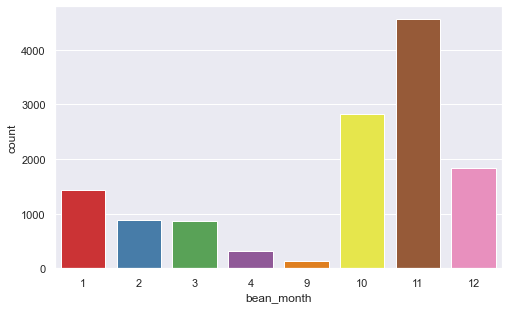

In [88]:
sns.set(rc={'figure.figsize':(8,4.82)})
ax = sns.countplot(x="bean_month", data=new_beans, palette="Set1")

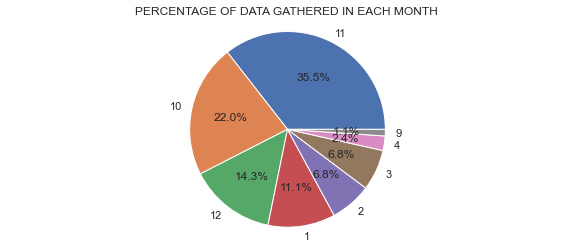

In [86]:
Values = [4569,2825,1835,1429,879,871,308,139]

my_labels = '11','10','12','1','2','3','4','9'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('PERCENTAGE OF DATA GATHERED IN EACH MONTH')
plt.axis('equal')
plt.show()

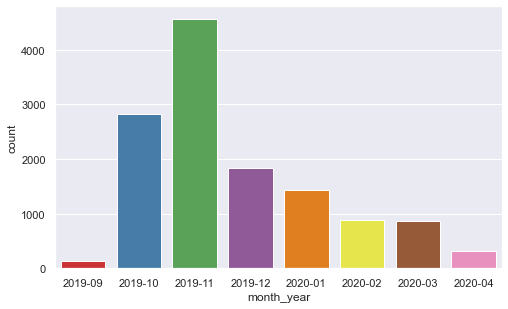

In [87]:
sns.set(rc={'figure.figsize':(8,4.82)})
ax = sns.countplot(x="month_year", data=new_beans, palette="Set1")

### STATISTICS FOR IMAGE CLASSES

In [72]:
#summary statistics for image classes shows how many crops were suffering from a certain disease.
new_beans['BEAN_IMAGE_CLASS'].value_counts()

als        5728
anc        3359
other      2536
healthy     925
weed        306
Name: BEAN_IMAGE_CLASS, dtype: int64

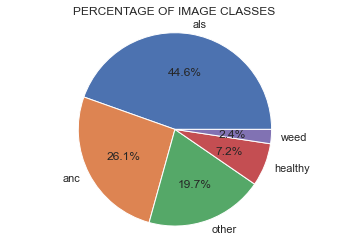

In [67]:
Values = [5728,3359,2536,925,306]

my_labels = 'als','anc','other','healthy','weed'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('PERCENTAGE OF IMAGE CLASSES')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='BEAN_IMAGE_CLASS', ylabel='count'>

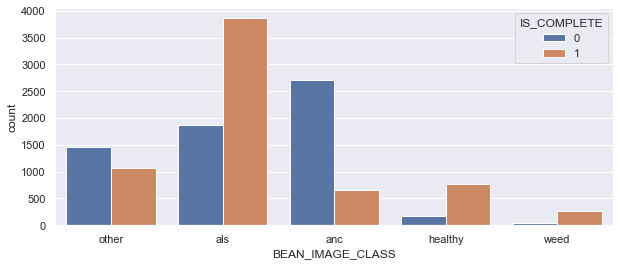

In [73]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x='BEAN_IMAGE_CLASS', hue='IS_COMPLETE', data=beans)

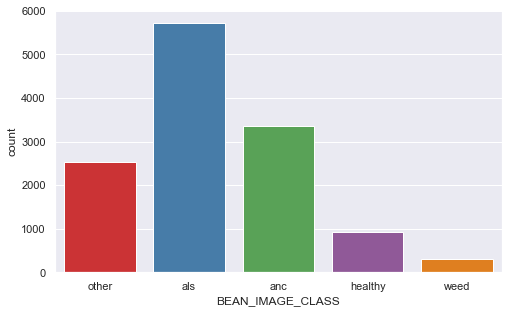

In [73]:
sns.set(rc={'figure.figsize':(8,4.82)})
ax = sns.countplot(x="BEAN_IMAGE_CLASS", data=new_beans, palette="Set1")

<AxesSubplot:xlabel='bean_month', ylabel='count'>

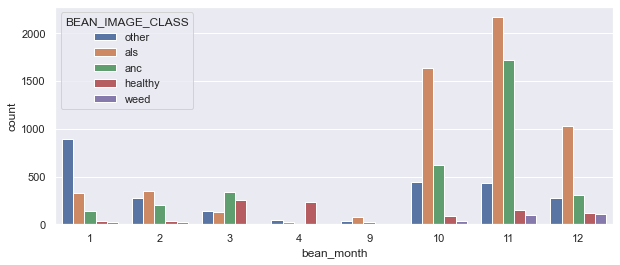

In [80]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x='bean_month', hue='BEAN_IMAGE_CLASS', data=new_beans)

<AxesSubplot:xlabel='beans_mnth_yr', ylabel='count'>

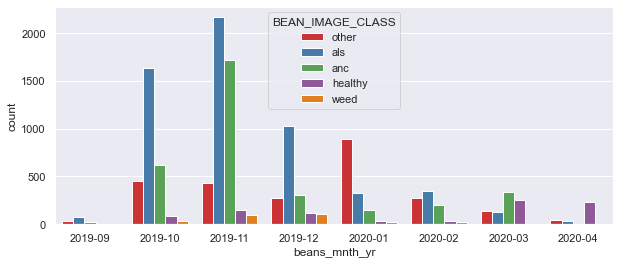

In [91]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x='beans_mnth_yr', hue='BEAN_IMAGE_CLASS', data=new_beans, palette="Set1")

In [64]:
#number of valid and invalid images captured by the users
new_beans['IS_COMPLETE'].value_counts()

1    6603
0    6252
Name: IS_COMPLETE, dtype: int64

In [65]:
#number of times each comment appeared
new_beans['BEAN_DATA_COMMENT'].value_counts()

Diseased                                                     5341
                                                             2858
Yellowing of the leaves with brownspots between the veins    1541
Brown spots on leaves                                         156
Disaeased                                                     145
                                                             ... 
Cleanbeans                                                      1
Yellow spots are seen on the bean leaves.                       1
Too much rain and weeds are destroying beans.                   1
Yellow rusted leaves                                            1
Big beans pod.                                                  1
Name: BEAN_DATA_COMMENT, Length: 1008, dtype: int64

In [47]:
beans['BEAN_DEVICE_ID'].value_counts().sort_values()

64505bddc047c82125cc10632ef3ddf057c0e1d9       1
857b9e4752e35c722b309d22f62777099df3dfd0       1
7a24671c398cf11b90af7e226451346f0b62eb10       1
2dae4e4494091116895bbd239344ff08be311cec       1
7cbd80c04a0efbe78256cddbc8bd3bed041895d1       1
                                            ... 
86ff1146ea9e8720169164843c6c94bc64ab14cc     403
14ec82c8cc85ba84613a9516f0290e9ea4823a83     438
7bb37df07d65931e06157a57f6dd017c929255c7    1400
25a61870709ffba7d51a013dbc423ee56714fa44    1926
51d3c9ef4a4b8b424ce923dc5b25f066304ce876    5748
Name: BEAN_DEVICE_ID, Length: 90, dtype: int64

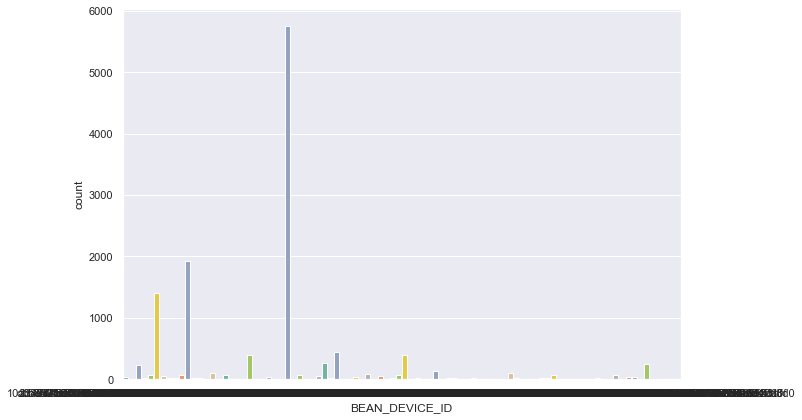

In [45]:
sns.set(rc={'figure.figsize':(10,6.82)})
ax.scatter = sns.countplot(x="BEAN_DEVICE_ID", data=beans, palette="Set2")

In [58]:
new_beans['BEAN_VARIETY'].value_counts()

                     8930
Nambale               970
Kayenbwa              531
Yellow beans          458
Kabonge               223
                     ... 
American bollworm       1
Longseed                1
Local variety.          1
I can't tell            1
Obweru                  1
Name: BEAN_VARIETY, Length: 276, dtype: int64

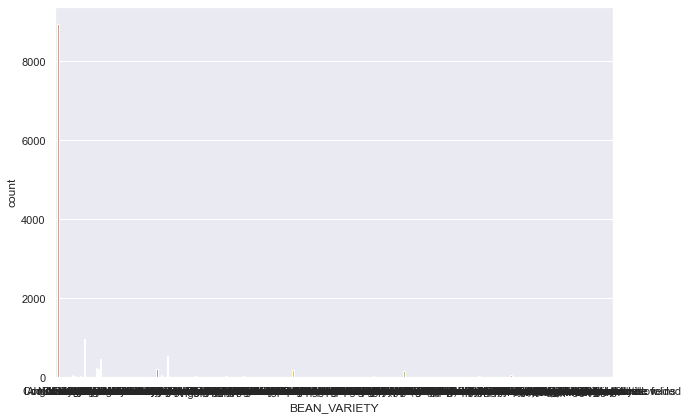

In [57]:
sns.set(rc={'figure.figsize':(10,6.82)})
ax.scatter = sns.countplot(x="BEAN_VARIETY", data=beans, palette="Set2")

Text(0, 0.5, 'IS_COMLETE')

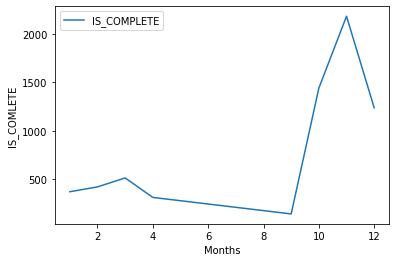

In [19]:
#According to the graph below, the validity of images decreased with time(submission date)
beans.groupby(beans.SUBMISSION_DATE.dt.month).IS_COMPLETE.sum().plot(subplots=True); plt.legend(loc='best', fontsize=10); plt.xlabel("Months", fontsize=10); plt.ylabel("IS_COMLETE", fontsize=10)

## Dealing with image data

In [66]:
beans.iloc[:,[0,15,7,22]]

,URI,BEAN_DATA_IMAGE_CLASS,_IS_COMPLETE,IMAGE_LINK
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,other,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,other,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,other,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,als,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,other,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...
12850,uuid:4837fc0b-4b1f-4f00-ad20-f874e9265870,other,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
12851,uuid:31fff940-5a29-4c14-91c5-96c685cfbd4a,healthy,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
12852,uuid:786bf823-9487-4e59-a628-fcf726404c65,healthy,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
12853,uuid:d5b79b51-15c4-4151-bebf-0ef1a46caea0,other,1,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [76]:
beans.columns

Index(['URI', 'CREATOR_USER_ID', 'CREATION_DATE', 'LAST_UPDATE_USER_ID',
       'LAST_UPDATE_DATE', 'MODEL_VERSION', 'UI_VERSION', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_VARIETY', 'BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'META_INSTANCE_ID',
       'BEAN_IMAGE_CLASS', 'BEAN_DATA_COMMENT', 'BEAN_GPS_ACC',
       'BEAN_DATA_SUBMISSION_TIME', 'BEAN_GPS_LAT', 'BEAN_DATA_START_TIME',
       'BEAN_DEVICE_ID', 'BEAN_IMAGE_LINKS'],
      dtype='object')

In [32]:
new_beans.columns

Index(['URI', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_VARIETY', 'BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'BEAN_IMAGE_CLASS',
       'BEAN_DATA_COMMENT', 'BEAN_GPS_ACC', 'BEAN_DATA_SUBMISSION_TIME',
       'BEAN_GPS_LAT', 'BEAN_DATA_START_TIME', 'beans_mnth_yr', 'bean_month'],
      dtype='object')

In [81]:
beans['BEAN_VARIETY'].isnull().sum()

0

In [93]:
beans.iloc[[60]].iloc[:,[13]]

,BEAN_GPS_ALT
60,1117.7


In [68]:
beans.shape

(12855, 23)

In [70]:
new_beans_valid = new_beans[new_beans['IS_COMPLETE'] == 1]
new_beans_valid

,URI,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,BEAN_DATA_END_TIME,BEAN_VARIETY,BEAN_GPS_LNG,BEAN_GPS_ALT,BEAN_IMAGE_CLASS,BEAN_DATA_COMMENT,BEAN_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_GPS_LAT,BEAN_DATA_START_TIME
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,2019-09-23 00:37:14.242,2019-09-23 00:37:14.242,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,2019-09-23 00:35:30.644,I do not know,32.597185,0.000000,other,Testing,2099.999,2019-09-23,0.422191,2019-09-23 00:32:32.194
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,2019-09-23 00:47:25.150,2019-09-23 00:47:25.150,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,2019-09-23 00:46:43.390,NaN,32.597948,1158.655716,other,NaN,4.000,2019-09-23,0.427186,2019-09-23 00:44:56.938
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,2019-09-23 13:09:22.873,2019-10-03 09:16:10.751,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,2019-09-23 12:23:40.590,Not clear,32.625300,1156.700000,other,I don't the disease,4.813,2019-09-23,0.521643,2019-09-23 12:21:06.861
3,uuid:aad12a8d-d9a7-4251-8974-8d03dc12d044,2019-09-23 13:09:42.299,2019-09-23 13:09:42.299,1,2019-09-23 13:09:42.293,2019-09-23 13:09:42.293,2019-09-23 12:57:58.117,NaN,32.625314,1146.000000,als,Commlon bacteria blight,7.300,2019-09-23,0.521536,2019-09-23 12:55:59.742
4,uuid:b350bff5-91e3-47e3-83d0-86e057bc9c74,2019-09-23 13:13:06.757,2019-09-23 13:13:06.757,1,2019-09-23 13:13:06.750,2019-09-23 13:13:06.750,2019-09-23 12:35:02.914,Babe 13,32.625322,1127.700000,other,Leaf spot,3.900,2019-09-23,0.521570,2019-09-23 12:33:52.393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12850,uuid:4837fc0b-4b1f-4f00-ad20-f874e9265870,2020-04-26 15:57:34.445,2020-04-26 15:57:34.445,1,2020-04-26 15:57:34.429,2020-04-26 15:57:34.429,2020-04-26 13:33:51.851,NaN,32.423092,1172.300000,other,Infected leaves,4.724,2020-04-26,0.715378,2020-04-26 13:32:47.011
12851,uuid:31fff940-5a29-4c14-91c5-96c685cfbd4a,2020-04-26 15:57:39.266,2020-04-26 15:57:39.266,1,2020-04-26 15:57:39.252,2020-04-26 15:57:39.252,2020-04-26 13:35:42.052,NaN,32.422957,1154.600000,healthy,NaN,4.641,2020-04-26,0.715577,2020-04-26 13:35:07.165
12852,uuid:786bf823-9487-4e59-a628-fcf726404c65,2020-04-26 16:32:28.237,2020-04-26 16:32:28.237,1,2020-04-26 16:32:28.226,2020-04-26 16:32:28.226,2020-04-26 16:25:55.683,NaN,32.423178,1154.400000,healthy,NaN,4.466,2020-04-26,0.715421,2020-04-26 13:37:43.468
12853,uuid:d5b79b51-15c4-4151-bebf-0ef1a46caea0,2020-04-26 16:32:35.680,2020-04-26 16:32:35.680,1,2020-04-26 16:32:35.652,2020-04-26 16:32:35.652,2020-04-26 16:27:00.481,NaN,32.423133,1146.000000,other,Leaf rust,4.640,2020-04-26,0.715420,2020-04-26 13:38:35.999


In [70]:
new_beans_valid = new_beans[new_beans['IS_COMPLETE'] == 0]
new_beans_valid

,URI,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,BEAN_DATA_END_TIME,BEAN_VARIETY,BEAN_GPS_LNG,BEAN_GPS_ALT,BEAN_IMAGE_CLASS,BEAN_DATA_COMMENT,BEAN_GPS_ACC,BEAN_DATA_SUBMISSION_TIME,BEAN_GPS_LAT,BEAN_DATA_START_TIME,beans_mnth_yr,month_year,bean_month
20,uuid:ed2aa67f-7a93-4cb1-9a44-e0c8acd6f4ce,2019-09-24 12:57:28.033,2019-09-24 12:58:31.372,0,2019-09-24 12:57:28.013,NaT,2019-09-23 13:11:30.942,NaN,32.625266,1143.1,als,,3.676,2019-09-23,0.521565,2019-09-23 10:38:52.053,2019-09,2019-09,9
57,uuid:6fc56d20-46cf-4e96-bbc0-17cd6635356a,2019-09-27 07:34:58.155,2019-09-27 07:34:58.155,0,2019-09-27 07:34:58.149,NaT,2019-09-27 07:34:44.310,NaN,0.692093,1110.2,other,,4.077,2019-09-25,34.006441,2019-09-25 10:40:00.200,2019-09,2019-09,9
263,uuid:8303727c-1a1a-4bb1-9ede-446e8124740e,2019-10-02 11:53:02.081,2019-10-02 11:53:02.081,0,2019-10-02 11:53:02.069,NaT,2019-09-23 16:57:45.504,NaN,32.626529,1110.5,als,,4.996,2019-09-23,0.539822,2019-09-23 16:55:52.151,2019-10,2019-10,10
313,uuid:7bce4c18-aea6-4eb8-9575-b090e9bc8d7f,2019-10-04 09:49:33.133,2019-10-04 09:49:33.133,0,2019-10-04 09:49:33.126,NaT,2019-09-27 06:53:54.388,NaN,32.635073,1137.5,other,Well spaced beans multiplication field,4.845,2019-09-27,0.521152,2019-09-27 06:51:05.770,2019-10,2019-10,10
355,uuid:01ef55df-158c-42f8-9b3f-49f4cc3637da,2019-10-04 19:39:52.341,2019-10-04 19:47:16.733,0,2019-10-04 19:39:52.334,NaT,2019-10-04 14:44:59.049,NaN,33.119299,1103.2,als,Yellow,4.159,2019-10-04,0.938196,2019-10-04 14:44:21.064,2019-10,2019-10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12541,uuid:a6581c4a-67b6-47f7-b15e-e3c42285436d,2020-03-24 05:32:54.539,2020-03-24 05:32:54.539,0,2020-03-24 05:32:54.533,NaT,2020-03-22 08:22:36.054,NaN,33.649799,1134.8,other,,4.680,2020-03-22,2.043076,2020-03-22 08:22:13.498,2020-03,2020-03,3
12542,uuid:5e1e2de8-21d9-41fa-86ef-9f078258f74b,2020-03-24 05:32:55.443,2020-03-24 05:32:55.443,0,2020-03-24 05:32:55.434,NaT,2020-03-22 08:23:35.118,NaN,33.649849,1134.6,other,,4.720,2020-03-22,2.043055,2020-03-22 08:23:12.902,2020-03,2020-03,3
12543,uuid:ddd23e21-2618-452e-adb3-ed66af4a1545,2020-03-24 05:32:56.508,2020-03-24 05:32:56.508,0,2020-03-24 05:32:56.501,NaT,2020-03-22 08:24:48.531,NaN,33.649835,1136.6,other,,6.300,2020-03-22,2.043090,2020-03-22 08:24:30.884,2020-03,2020-03,3
12544,uuid:500a7d32-56ac-4b1e-8565-15d5d6831849,2020-03-24 05:32:57.483,2020-03-24 05:32:57.483,0,2020-03-24 05:32:57.476,NaT,2020-03-22 08:25:37.258,NaN,33.649802,1125.3,other,,7.100,2020-03-22,2.043010,2020-03-22 08:25:16.034,2020-03,2020-03,3


In [13]:
new_beans.iloc[:,[8,14]]

,BEAN_GPS_LNG,BEAN_GPS_LAT
0,32.597185,0.422191
1,32.597948,0.427186
2,32.625300,0.521643
3,32.625314,0.521536
4,32.625322,0.521570
...,...,...
12850,32.423092,0.715378
12851,32.422957,0.715577
12852,32.423178,0.715421
12853,32.423133,0.715420


In [20]:
beans_gps = new_beans.iloc[:,[8,14]]
beans_gps.columns

Index(['BEAN_GPS_LNG', 'BEAN_GPS_LAT'], dtype='object')

In [21]:
beans_gps.to_csv(r'~/Downloads/datasets/beans_gps.csv')

In [72]:
new_beans_gps = pd.read_csv(r'~/Downloads/datasets/new_beans_gps.csv')
new_beans_gps

,given_lon,given_lat,distance,formatted,lat,lon,housenumber,district,name,state_code,...,county,postcode,suburb,city,state,country,country_code,attribution,attribution_license,attribution_url
0,32.597185,0.422191,27.840545,"Kira, Uganda",0.422286,32.596953,NaN,NaN,NaN,NaN,...,NaN,7112,Buwate,Kira,Wakiso,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
1,32.597948,0.427186,61.043785,"Kira, Uganda",0.427292,32.597409,NaN,NaN,NaN,NaN,...,NaN,7112,Buwate,Kira,Wakiso,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
2,32.625300,0.521643,117.330858,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,...,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
3,32.625314,0.521536,113.422622,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,...,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
4,32.625322,0.521570,113.193368,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,...,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12850,32.423092,0.715378,526.786735,"MIGGADDE YOUTH FARM, Nakaseke, Uganda",0.718894,32.419917,NaN,NaN,MIGGADDE YOUTH FARM,NaN,...,Nakaseke,NaN,NaN,NaN,Luwero,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
12851,32.422957,0.715577,500.270535,"MIGGADDE YOUTH FARM, Nakaseke, Uganda",0.718894,32.419917,NaN,NaN,MIGGADDE YOUTH FARM,NaN,...,Nakaseke,NaN,NaN,NaN,Luwero,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
12852,32.423178,0.715421,529.668566,"MIGGADDE YOUTH FARM, Nakaseke, Uganda",0.718894,32.419917,NaN,NaN,MIGGADDE YOUTH FARM,NaN,...,Nakaseke,NaN,NaN,NaN,Luwero,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
12853,32.423133,0.715420,526.353819,"MIGGADDE YOUTH FARM, Nakaseke, Uganda",0.718894,32.419917,NaN,NaN,MIGGADDE YOUTH FARM,NaN,...,Nakaseke,NaN,NaN,NaN,Luwero,Uganda,ug,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright


In [73]:
new_beans_gps['city'][700]

'Arapi'

In [54]:
new_beans_gps.iloc[:,[14]].loc[700]

city    Arapi
Name: 700, dtype: object

In [22]:
new_beans_gps.shape

(12855, 21)

In [18]:
new_beans_gps.columns

Index(['given_lon', 'given_lat', 'distance', 'formatted', 'lat', 'lon',
       'housenumber', 'district', 'name', 'state_code', 'street', 'county',
       'postcode', 'suburb', 'city', 'state', 'country', 'country_code',
       'attribution', 'attribution_license', 'attribution_url'],
      dtype='object')

In [75]:
new_beans_gps1 = new_beans_gps.iloc[:,[0,1,2,3,4,5,7,8,9,11,13,14,15,16]]
new_beans_gps1.columns

Index(['given_lon', 'given_lat', 'distance', 'formatted', 'lat', 'lon',
       'district', 'name', 'state_code', 'county', 'suburb', 'city', 'state',
       'country'],
      dtype='object')

In [37]:
new_beans_gps1.head(10)

,given_lon,given_lat,distance,formatted,lat,lon,district,name,state_code,county,suburb,city,state,country
0,32.597185,0.422191,27.840545,"Kira, Uganda",0.422286,32.596953,NaN,NaN,NaN,NaN,Buwate,Kira,Wakiso,Uganda
1,32.597948,0.427186,61.043785,"Kira, Uganda",0.427292,32.597409,NaN,NaN,NaN,NaN,Buwate,Kira,Wakiso,Uganda
2,32.625300,0.521643,117.330858,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
3,32.625314,0.521536,113.422622,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
4,32.625322,0.521570,113.193368,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
5,32.625266,0.521544,118.828856,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
6,32.625300,0.521610,116.448173,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
7,32.624977,0.521707,153.948724,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
8,32.625241,0.521617,123.081722,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
9,32.624534,0.522781,402.527840,"Namulonge Agronometeorology Station, Kyadondo,...",0.521400,32.627880,NaN,Namulonge Agronometeorology Station,NaN,Kyadondo,NaN,NaN,Wakiso,Uganda


In [76]:
df = pd.concat([new_beans, new_beans_gps1], axis=1)
df.columns

Index(['URI', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'BEAN_DATA_END_TIME',
       'BEAN_VARIETY', 'BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'BEAN_IMAGE_CLASS',
       'BEAN_DATA_COMMENT', 'BEAN_GPS_ACC', 'BEAN_DATA_SUBMISSION_TIME',
       'BEAN_GPS_LAT', 'BEAN_DATA_START_TIME', 'given_lon', 'given_lat',
       'distance', 'formatted', 'lat', 'lon', 'district', 'name', 'state_code',
       'county', 'suburb', 'city', 'state', 'country'],
      dtype='object')

In [42]:
df.shape

(12855, 30)

In [41]:
df.head(3)

,URI,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,BEAN_DATA_END_TIME,BEAN_VARIETY,BEAN_GPS_LNG,BEAN_GPS_ALT,...,lat,lon,district,name,state_code,county,suburb,city,state,country
0,uuid:b312522b-f322-43ad-bc31-75df9bd5228b,2019-09-23 00:37:14.242,2019-09-23 00:37:14.242,1,2019-09-23 00:37:14.227,2019-09-23 00:37:14.227,2019-09-23 00:35:30.644,I do not know,32.597185,0.000000,...,0.422286,32.596953,NaN,NaN,NaN,NaN,Buwate,Kira,Wakiso,Uganda
1,uuid:8305c43b-00fb-4419-9f54-28388d176080,2019-09-23 00:47:25.150,2019-09-23 00:47:25.150,1,2019-09-23 00:47:25.139,2019-09-23 00:47:25.139,2019-09-23 00:46:43.390,,32.597948,1158.655716,...,0.427292,32.597409,NaN,NaN,NaN,NaN,Buwate,Kira,Wakiso,Uganda
2,uuid:d321337b-2369-4479-a39b-7804b79489d8,2019-09-23 13:09:22.873,2019-10-03 09:16:10.751,1,2019-09-23 13:09:22.858,2019-10-03 09:16:10.736,2019-09-23 12:23:40.590,Not clear,32.625300,1156.700000,...,0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda


In [78]:
new_df = df.iloc[:,[8,9,12,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
new_df.columns

Index(['BEAN_GPS_LNG', 'BEAN_GPS_ALT', 'BEAN_GPS_ACC', 'BEAN_GPS_LAT',
       'given_lon', 'given_lat', 'distance', 'formatted', 'lat', 'lon',
       'district', 'name', 'state_code', 'county', 'suburb', 'city', 'state',
       'country'],
      dtype='object')

In [86]:
new_df.head(10)

,BEAN_GPS_LNG,BEAN_GPS_ALT,BEAN_GPS_ACC,BEAN_GPS_LAT,given_lon,given_lat,distance,formatted,lat,lon,district,name,state_code,county,suburb,city,state,country
0,32.597185,0.000000,2099.999,0.422191,32.597185,0.422191,27.840545,"Kira, Uganda",0.422286,32.596953,NaN,NaN,NaN,NaN,Buwate,Kira,Wakiso,Uganda
1,32.597948,1158.655716,4.000,0.427186,32.597948,0.427186,61.043785,"Kira, Uganda",0.427292,32.597409,NaN,NaN,NaN,NaN,Buwate,Kira,Wakiso,Uganda
2,32.625300,1156.700000,4.813,0.521643,32.625300,0.521643,117.330858,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
3,32.625314,1146.000000,7.300,0.521536,32.625314,0.521536,113.422622,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
4,32.625322,1127.700000,3.900,0.521570,32.625322,0.521570,113.193368,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
5,32.625266,1152.100000,10.000,0.521544,32.625266,0.521544,118.828856,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
6,32.625300,1151.900000,10.000,0.521610,32.625300,0.521610,116.448173,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
7,32.624977,1167.900000,4.712,0.521707,32.624977,0.521707,153.948724,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
8,32.625241,1170.200000,5.087,0.521617,32.625241,0.521617,123.081722,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda
9,32.624534,1143.000000,10.000,0.522781,32.624534,0.522781,402.527840,"Namulonge Agronometeorology Station, Kyadondo,...",0.521400,32.627880,NaN,Namulonge Agronometeorology Station,NaN,Kyadondo,NaN,NaN,Wakiso,Uganda


In [80]:
new_df.iloc[:,[3]].loc[700]

BEAN_GPS_LAT    1.800883
Name: 700, dtype: float64

## Calculating distance between points
#### Was able to calculate distance between cities using Kira as my starting point.

In [81]:
def haversine_distance(lat1,lon1,lat2,lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    res = r * (2*np.arctan2(np.sqrt(a),np.sqrt(1 - a)))
    return np.round(res, 2)

In [82]:
start_lat, start_lon = 0.427186, 32.597948

In [83]:
cities = pd.DataFrame(data={
    'City' : ['Kira','Namulonge','Arapi'],
    'Lat' : [0.427186,0.521643,1.800883],
    'Lon' : [32.597948,32.625300,33.625676]})

In [84]:
distance_km = []
for row in cities.itertuples(index=False):
    distance_km.append(
    haversine_distance(start_lat, start_lon, row.Lat, row.Lon))

In [85]:
cities['DistanceFromKira'] = distance_km
cities.columns

Index(['City', 'Lat', 'Lon', 'DistanceFromKira'], dtype='object')

In [88]:
cities.head()

,City,Lat,Lon,DistanceFromKira
0,Kira,0.427186,32.597948,0.00
1,Namulonge,0.521643,32.625300,10.93
2,Arapi,1.800883,33.625676,190.75


In [ ]:
cities['dist'] = distance_km
cities.columns

In [81]:
new_df.head(3)

,BEAN_GPS_LNG,BEAN_GPS_ALT,BEAN_GPS_ACC,BEAN_GPS_LAT,given_lon,given_lat,distance,formatted,lat,lon,district,name,state_code,county,suburb,city,state,country
0,32.597185,0.000000,2099.999,0.422191,32.597185,0.422191,27.840545,"Kira, Uganda",0.422286,32.596953,NaN,NaN,NaN,NaN,Buwate,Kira,Wakiso,Uganda
1,32.597948,1158.655716,4.000,0.427186,32.597948,0.427186,61.043785,"Kira, Uganda",0.427292,32.597409,NaN,NaN,NaN,NaN,Buwate,Kira,Wakiso,Uganda
2,32.625300,1156.700000,4.813,0.521643,32.625300,0.521643,117.330858,"Namulonge Agronometeorology Station, Namulonge...",0.521375,32.626321,NaN,NaN,NaN,NaN,Namulonge Agronometeorology Station,Namulonge,Wakiso,Uganda


## Dashboards

In [26]:
!pip install plotly
!pip install dash
!pip install dash_bootstrap_components

  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100477 sha256=f43af3438c4c992dd627445f6d8c189c8340f1a9292b437c527a313ffa1e2300
  Stored in directory: c:\users\b reign\appdata\local\pip\cache\wheels\56\e4\21\8a1190a7c31f3aa3f8834b05126ded8bf105b8fd11fad1806e
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738982 sha256=05d79ac288b35bdd717ed4fb4e6c355a7c78e225a7b3aab59ff2fff039b5dbbc
  Stored in directory: c:\users\b reign\appdata\local\pip\cache\wheels\08\ae\6a\0f4a0ee8fa216ebf1f2e57277693a20d80e8a2cfe549f66d86
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319751 sha256=da8488fbd7817a3b6bd8f40e115f0b11dd8eb1521159e96f91753c4bedc1367c
  Stored in directory: c:\users\b reign\appdata\local\pip\cache\wheels\12\fe\5a\d0f2f657ee34cef5cc3fced1d8992994fac1ca6232a03c6c03
  Created wheel for dash-table: filename=dash_table-4.12.0-py3-none-any.whl size=1837669 sha256=44

In [27]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc

# dealing with device ids

In [11]:
beans['BEAN_DEVICE_ID']

0                 NaN
1        3.550051e+14
2                 NaN
3        3.582461e+14
4        3.582461e+14
             ...     
12850    3.595541e+14
12851    3.595541e+14
12852    3.595541e+14
12853    3.595541e+14
12854    3.595541e+14
Name: BEAN_DEVICE_ID, Length: 12855, dtype: float64

In [14]:
beans['BEAN_DEVICE_ID'].fillna("", inplace=True)
beans['BEAN_DEVICE_ID']

0                         
1        355005076612431.0
2                         
3        358246082857761.0
4        358246082860328.0
               ...        
12850    359554100438608.0
12851    359554100438608.0
12852    359554100438608.0
12853    359554100438608.0
12854    359554100438608.0
Name: BEAN_DEVICE_ID, Length: 12855, dtype: object

In [15]:
beans.shape

(12855, 23)

In [16]:
beans['BEAN_DEVICE_ID'].unique()

array(['', 355005076612431.0, 358246082857761.0, 358246082860328.0,
       358246082899805.0, 358246082940567.0, 358246082857522.0,
       352551101756985.0, 358258100478983.0, 358246082877124.0,
       358258100479080.0, 358246082855369.0, 358246082899920.0,
       358258100442385.0, 358246082882785.0, 358246082878981.0,
       358246082877025.0, 358246082902443.0, 358246082924488.0,
       358246082134765.0, 358246082932184.0, 358246082922342.0,
       358246082923381.0, 358246082131803.0, 358246082857001.0,
       358468744773893.0, 358258101378745.0, 358246082135184.0,
       358258100504267.0, 359050097791083.0, 358246082858124.0,
       358246082859940.0, 358246082878262.0, 358246082907863.0,
       358246082910628.0, 358246082127702.0, 358246082911220.0,
       358246082910164.0, 358246082858223.0, 358246082931988.0,
       358246082878122.0, 358246082901684.0, 358246082857902.0,
       358246082949162.0, 358246082856607.0, 358246082909802.0,
       358246082893287.0, 3582581013

In [18]:
beans['BEAN_DEVICE_ID'].unique().tolist()

['',
 355005076612431.0,
 358246082857761.0,
 358246082860328.0,
 358246082899805.0,
 358246082940567.0,
 358246082857522.0,
 352551101756985.0,
 358258100478983.0,
 358246082877124.0,
 358258100479080.0,
 358246082855369.0,
 358246082899920.0,
 358258100442385.0,
 358246082882785.0,
 358246082878981.0,
 358246082877025.0,
 358246082902443.0,
 358246082924488.0,
 358246082134765.0,
 358246082932184.0,
 358246082922342.0,
 358246082923381.0,
 358246082131803.0,
 358246082857001.0,
 358468744773893.0,
 358258101378745.0,
 358246082135184.0,
 358258100504267.0,
 359050097791083.0,
 358246082858124.0,
 358246082859940.0,
 358246082878262.0,
 358246082907863.0,
 358246082910628.0,
 358246082127702.0,
 358246082911220.0,
 358246082910164.0,
 358246082858223.0,
 358246082931988.0,
 358246082878122.0,
 358246082901684.0,
 358246082857902.0,
 358246082949162.0,
 358246082856607.0,
 358246082909802.0,
 358246082893287.0,
 358258101379008.0,
 358246082927200.0,
 358246082878767.0,
 35824608294942

In [26]:
beans['BEAN_DEVICE_ID'].value_counts(ascending=True).tolist()

[1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 8,
 8,
 8,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 11,
 12,
 12,
 14,
 15,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 22,
 23,
 23,
 24,
 27,
 27,
 31,
 36,
 39,
 40,
 42,
 53,
 56,
 58,
 64,
 68,
 70,
 70,
 76,
 77,
 77,
 89,
 95,
 95,
 127,
 238,
 244,
 265,
 395,
 403,
 438,
 1400,
 1926,
 5748]

In [32]:
beans["BEAN_DEVICE_ID"].replace({355005076612431.0: 1, 358246082857761.0: 2, 358246082860328.0:3, 358246082899805.0: 4, 358246082940567.0:5, 358246082857522.0:6,
       352551101756985.0:7, 358258100478983.0:8, 358246082877124.0:9,
       358258100479080.0:10, 358246082855369.0:11, 358246082899920.0:12,
       358258100442385.0:13, 358246082882785.0:14, 358246082878981.0:15,
       358246082877025.0:16, 358246082902443.0:17, 358246082924488.0:18,
       358246082134765.0:19, 358246082932184.0:20, 358246082922342.0:21,
       358246082923381.0:22, 358246082131803.0:23, 358246082857001.0:24,
       358468744773893.0:25, 358258101378745.0:26, 358246082135184.0:27,
       358258100504267.0:28, 359050097791083.0:29, 358246082858124.0:30,
       358246082859940.0:31, 358246082878262.0:32, 358246082907863.0:33,
       358246082910628.0:34, 358246082127702.0:36, 358246082911220.0:37,
       358246082910164.0:38, 358246082858223.0:39, 358246082931988.0:40,
       358246082878122.0:41, 358246082901684.0:42, 358246082857902.0:43,
       358246082949162.0:44, 358246082856607.0:45, 358246082909802.0:46,
       358246082893287.0:47, 358258101379008.0:48, 358246082927200.0:49,
       358246082878767.0:50, 358246082949428.0:51, 359474234787657.0:52,
       358246082923480.0:53, 358246082930121.0:54, 358258102909225.0:55,
       358246082904407.0:56, 358246082895381.0:57, 358246082884500.0:58,
       358246082928323.0:59, 357904063441697.0:60, 358246082929909.0:61,
       358246082888527.0:62, 358246082125383.0:63, 358246082133346.0:64,
       358246082901502.0:65, 358246082883726.0:66, 359050096567328.0:67,
       358246082911600.0:68, 358246082875243.0:69, 358246082895183.0:69,
       355277106227361.0:70, 359554100399644.0:71, 358246082942829.0:72,
       358246082927648.0:73, 358246082899466.0:74, 359554100617821.0:75,
       359554100829046.0:76, 358246082879047.0:77, 358246082119089.0:78,
       359554100438608.0:79, 359554100839805.0:80, 359554100404147.0:81,
       352855105384284.0:82, 358246082128122.0:83, 358246082887685.0:84,
       352195090106925.0:85, 358246082895266.0:86, 358356107979704.0:87,
       358246082904761.0:88, 358246082938561.0:89}, inplace=True)

beans['BEAN_DEVICE_ID']


0          
1         1
2          
3         2
4         3
         ..
12850    79
12851    79
12852    79
12853    79
12854    79
Name: BEAN_DEVICE_ID, Length: 12855, dtype: object

In [39]:
beans['BEAN_DEVICE_ID'].tolist()

['',
 1,
 '',
 2,
 3,
 4,
 4,
 '',
 '',
 5,
 5,
 5,
 '',
 '',
 '',
 6,
 6,
 6,
 6,
 6,
 '',
 7,
 7,
 8,
 9,
 10,
 9,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 8,
 11,
 12,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 9,
 9,
 '',
 16,
 16,
 16,
 7,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 6,
 6,
 6,
 6,
 6,
 17,
 9,
 9,
 9,
 6,
 6,
 6,
 '',
 '',
 18,
 18,
 18,
 19,
 19,
 20,
 21,
 21,
 21,
 22,
 23,
 24,
 24,
 '',
 '',
 '',
 10,
 10,
 10,
 10,
 10,
 7,
 7,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 25,
 25,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,


In [40]:
beans['BEAN_DEVICE_ID'].unique()

array(['', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89], dtype=object)

In [41]:
beans['BEAN_DEVICE_ID'].unique().tolist()

['',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89]